### About this file

The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system .

Total no. of attributes:16 No .of instances:284 Attribute information:
 1. Gender: M(male), F(female)
 2. Age: Age of the patient 
 3. Smoking: YES=2 , NO=1. 
 4. Yellow fingers: YES=2 , NO=1.
 5. Anxiety: YES=2 , NO=1.
 6. Peer_pressure: YES=2 , NO=1. 
 7. Chronic Disease: YES=2 , NO=1. 
 8. Fatigue: YES=2 , NO=1. 
 9. Allergy: YES=2 , NO=1. 
 10. Wheezing: YES=2 , NO=1. 
 11. Alcohol: YES=2 , NO=1. 
 12. Coughing: YES=2 , NO=1. 
 13. Shortness of Breath: YES=2 , NO=1. 
 14. Swallowing Difficulty: YES=2 , NO=1. 
 15. Chest pain: YES=2 , NO=1. 
 16. Lung Cancer: YES , NO.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# reading the dataset

data =pd.read_csv("survey lung cancer.csv")

In [4]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
#statistical summary
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

#### Data Cleaning 


In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [12]:
#checking for outliers using statistical method
def detect_outliers_iqr(data):
    outliers = []
    for col in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers.extend(data[(data[col] < lower_bound) | (data[col] > upper_bound)].index)
    return set(outliers)


outliers = detect_outliers_iqr(data)
print(f"Number of outliers detected: {len(outliers)}")


Number of outliers detected: 4


In [13]:
#remove outliers
data_cleaned = data.drop(index=outliers)

In [18]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### Data Visualization

Given that our data is already encoded we are going to create a copy of the actual data so we can map it to the descriptions for 

In [21]:
#creating a mapping fuction for custom encoding
def mapping_function(column):
    mapping = {
        2 : 'Yes',
        1 : 'No',
    }

    return column.map(mapping)


data_visualization = data_cleaned.copy()

#map all the columns 
for col in data_visualization.columns:
    if data_visualization[col].dtype == 'int64' and data_visualization[col].nunique() <= 2:
        data_visualization[col] = mapping_function(data_visualization[col])

data_visualization.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,M,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,F,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,M,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,F,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO


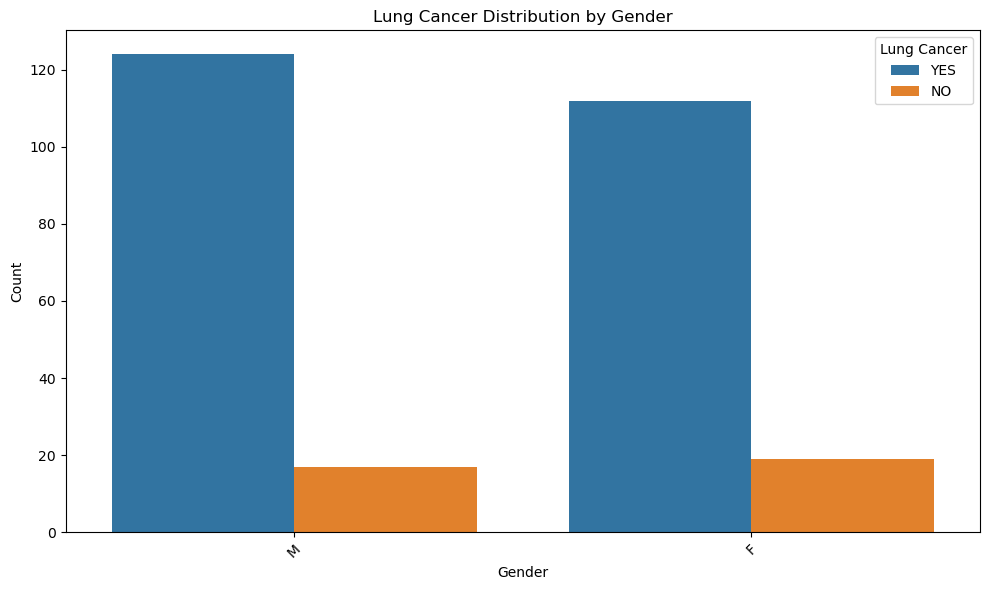

In [23]:
# Gender and lung cancer relationship
plt.figure(figsize=(10, 6))
sns.countplot(
    data_visualization,  # Add the data parameter
    x='GENDER',
    hue='LUNG_CANCER'
)
plt.title('Lung Cancer Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')  # More appropriate label
plt.xticks(rotation=45)
plt.legend(title='Lung Cancer')  # Add legend title for clarity
plt.tight_layout()
plt.show()

C:\Users\pales\AppData\Local\Temp\ipykernel_7896\3575968145.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Lung Cancer')


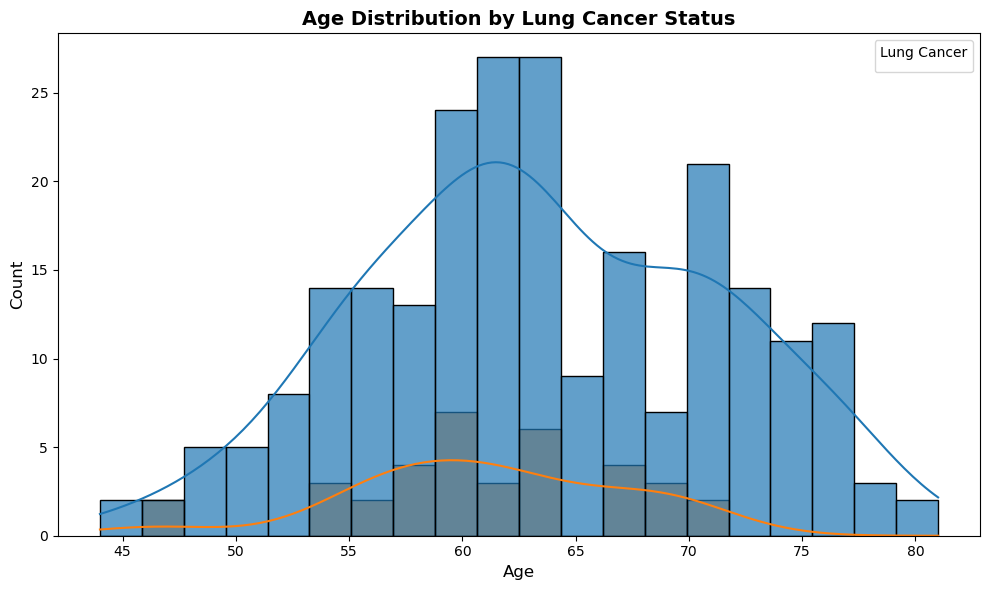

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data_visualization,
    x='AGE',
    hue='LUNG_CANCER',
    bins=20,
    alpha=0.7,
    kde=True
)
plt.title('Age Distribution by Lung Cancer Status', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Lung Cancer')
plt.tight_layout()
plt.show()

In [25]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

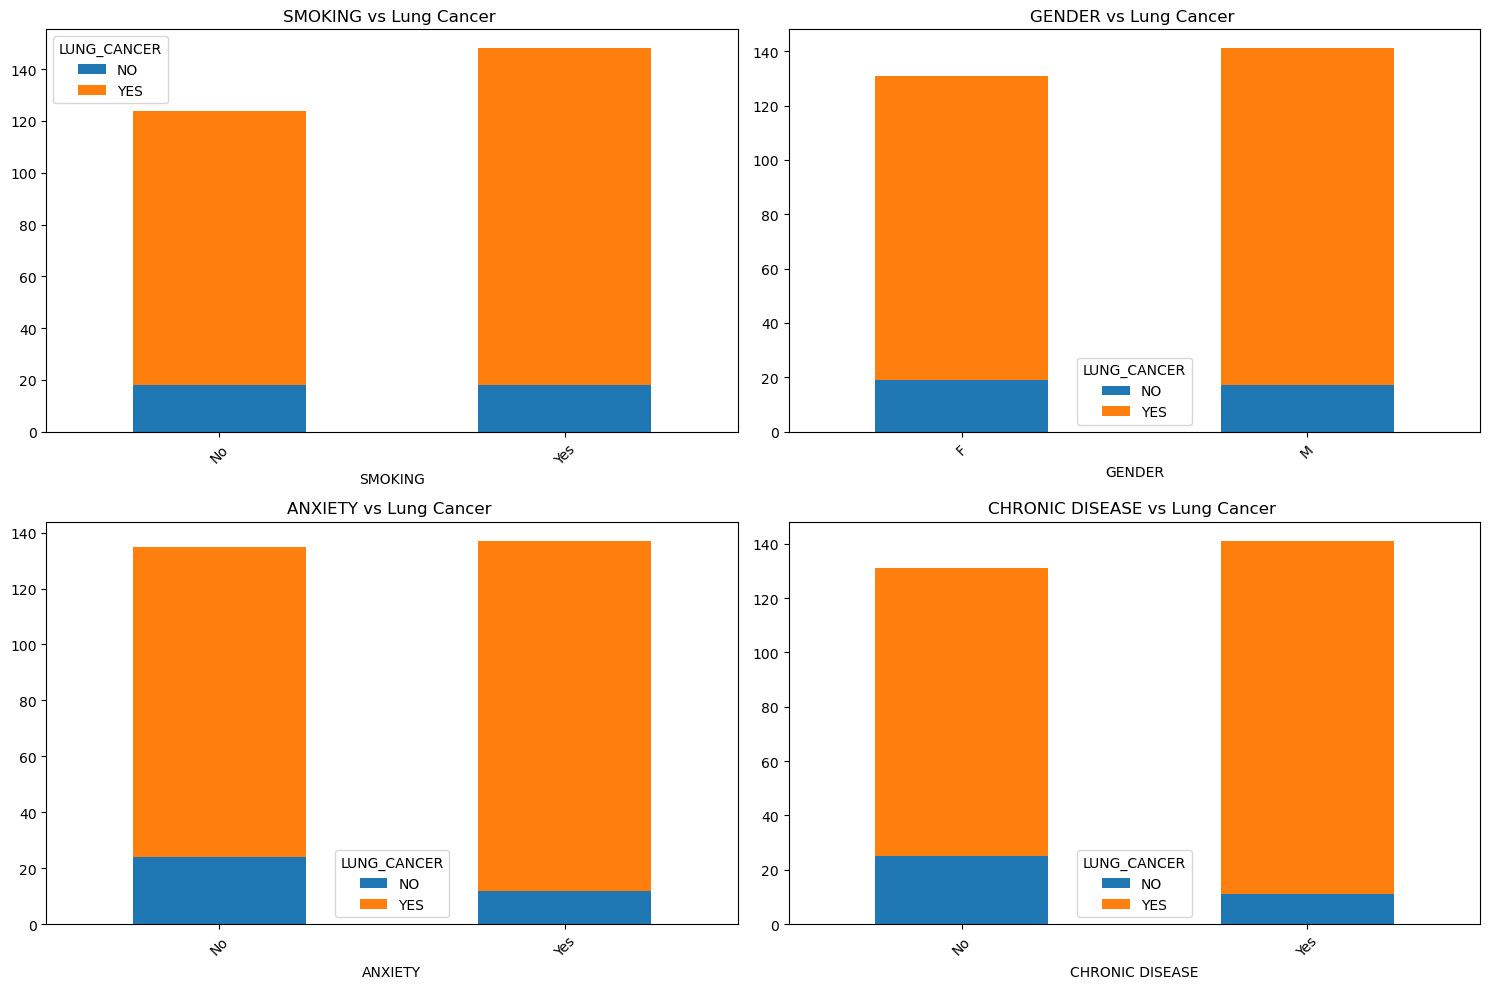

In [38]:

# Stacked bar chart for multiple variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

variables = ['SMOKING', 'GENDER', 'ANXIETY', 'CHRONIC DISEASE']
for i, var in enumerate(variables):
    cross_tab = pd.crosstab(data_visualization[var], data_visualization['LUNG_CANCER'])
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{var} vs Lung Cancer ')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

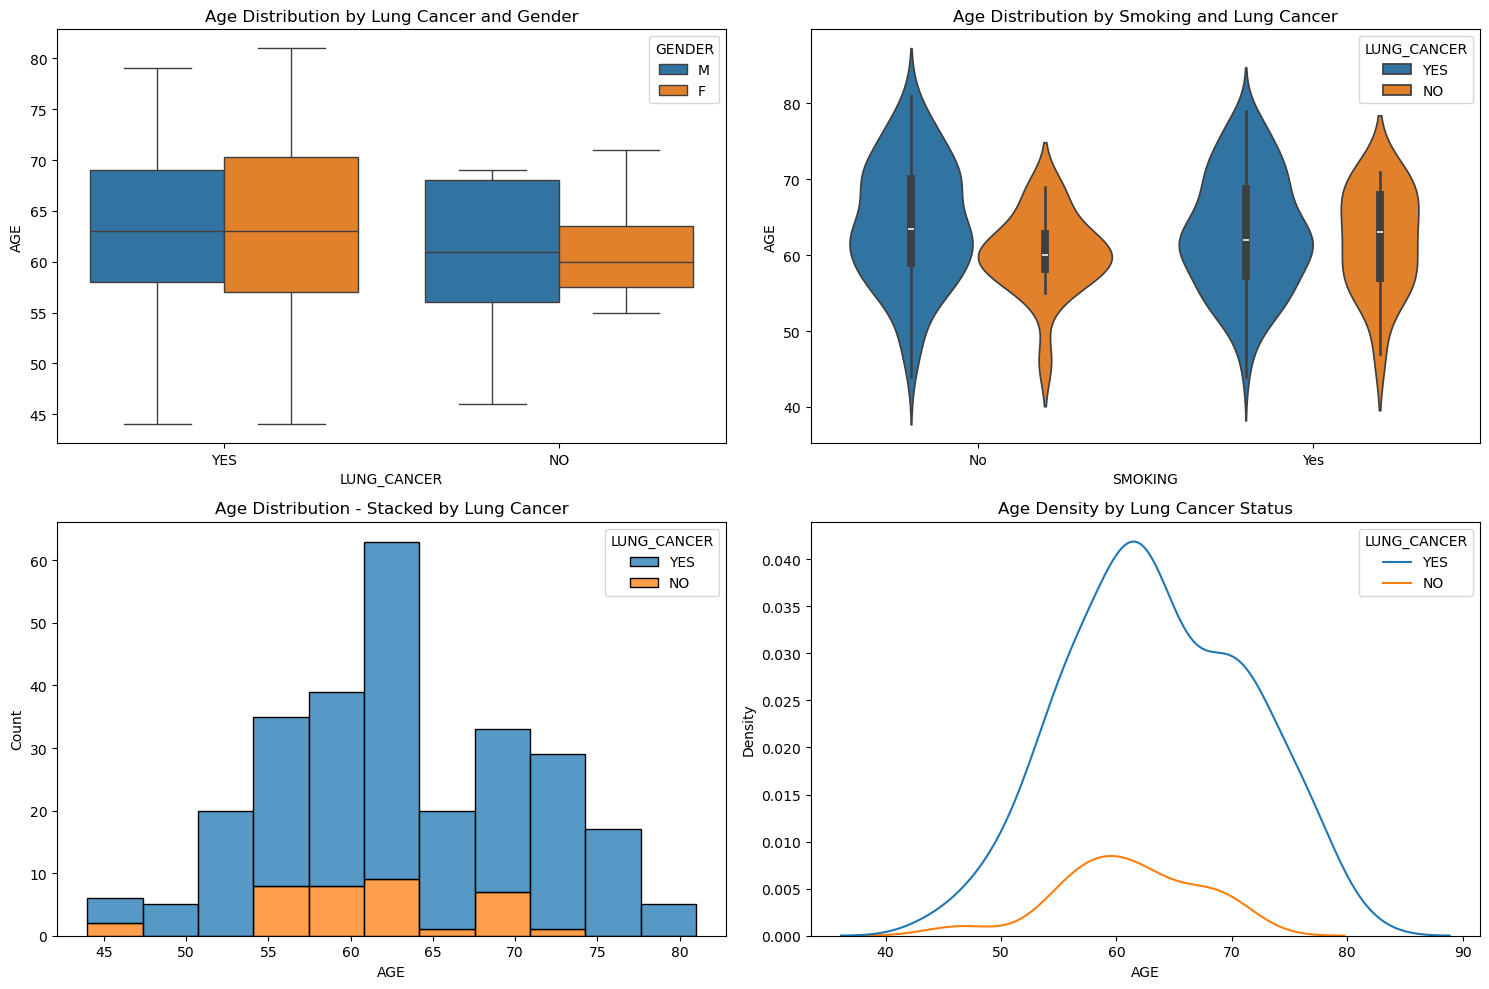

In [39]:
# Age distribution by multiple factors
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age vs Lung
sns.boxplot(data=data_visualization, x='LUNG_CANCER', y='AGE', hue='GENDER', ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Lung Cancer and Gender')

# Age vs Smoking
sns.violinplot(data=data_visualization, x='SMOKING', y='AGE', hue='LUNG_CANCER', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Smoking and Lung Cancer')

# Age histogram with multiple hues
sns.histplot(data=data_visualization, x='AGE', hue='LUNG_CANCER', multiple='stack', ax=axes[1,0])
axes[1,0].set_title('Age Distribution - Stacked by Lung Cancer')

# Age density plot
sns.kdeplot(data=data_visualization, x='AGE', hue='LUNG_CANCER', ax=axes[1,1])
axes[1,1].set_title('Age Density by Lung Cancer Status')

plt.tight_layout()
plt.show()

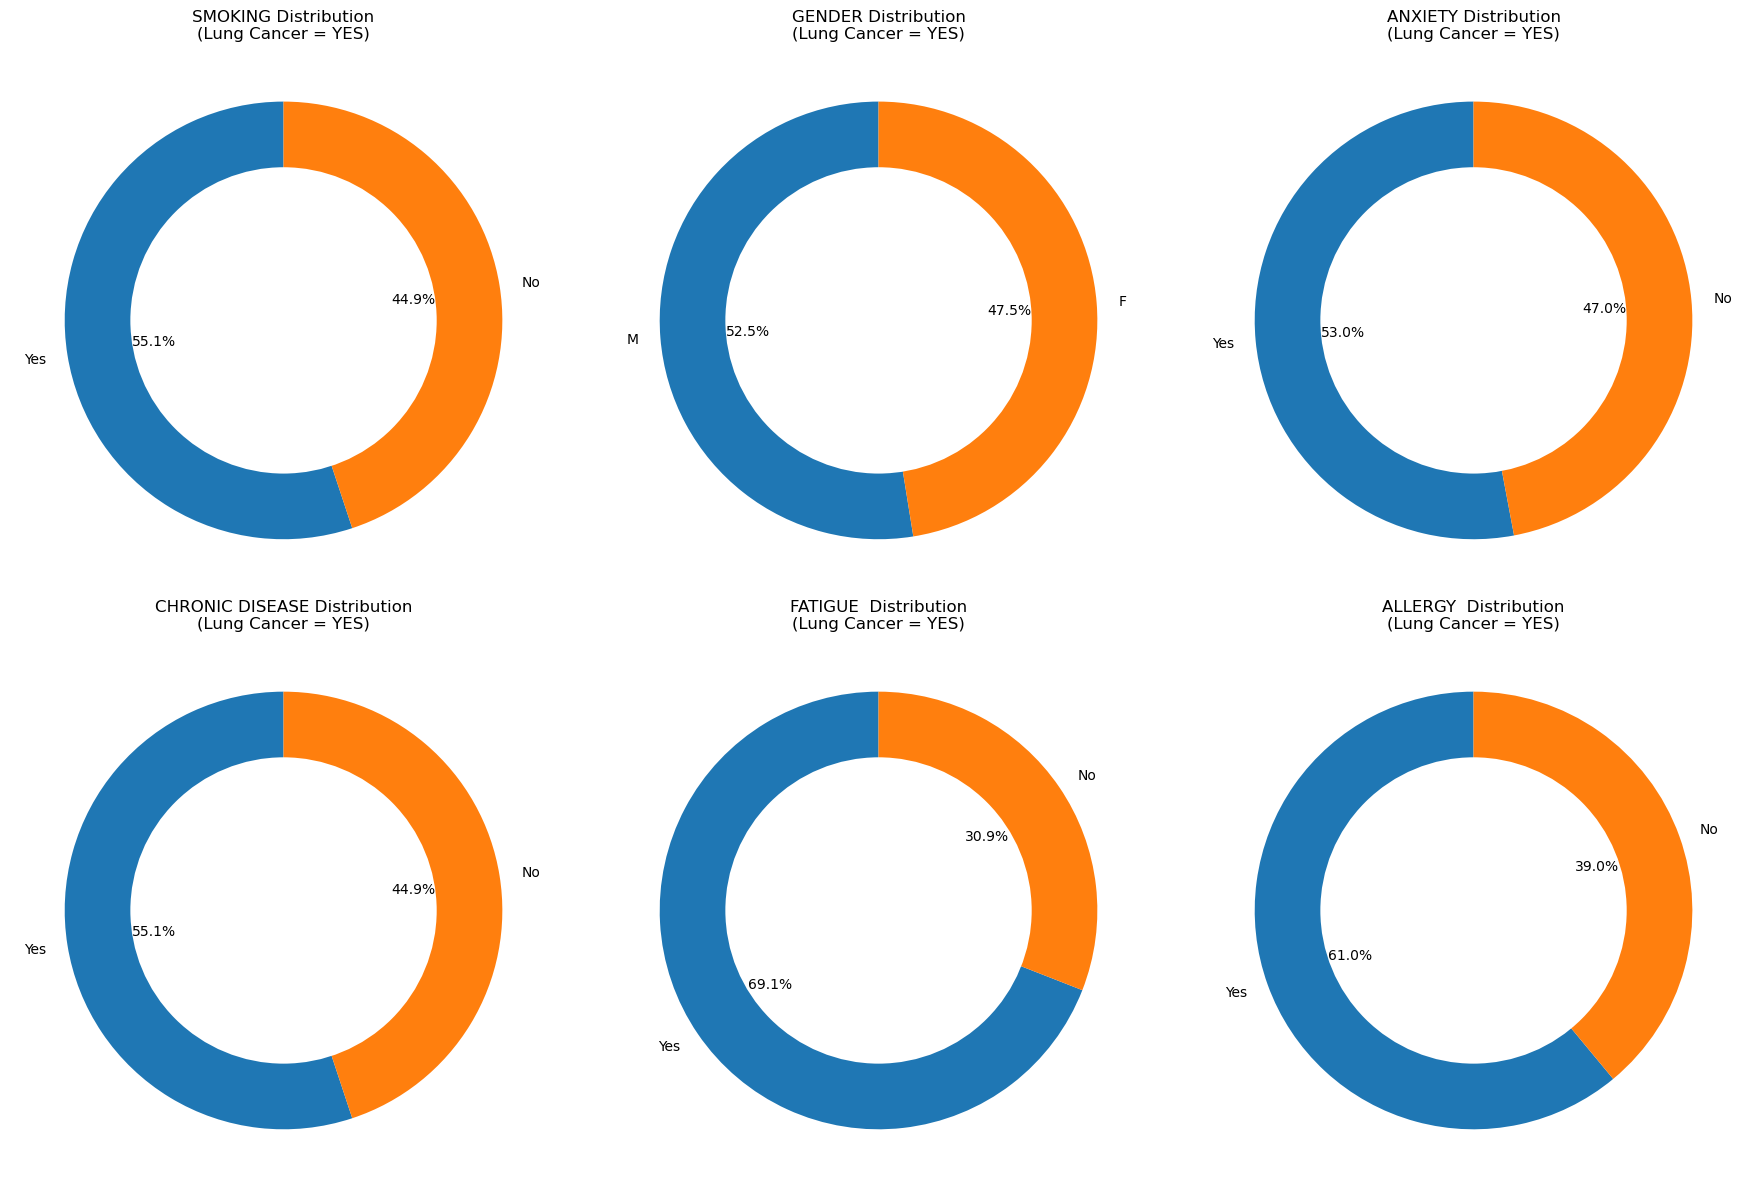

In [37]:
# Multiple pie charts
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

variables = ['SMOKING', 'GENDER', 'ANXIETY', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ']
for i, var in enumerate(variables):
    lung_cancer_yes = data_visualization[data_visualization['LUNG_CANCER'] == 'YES']
    var_counts = lung_cancer_yes[var].value_counts()
    wedges, texts, autotexts = axes[i].pie(var_counts.values, labels=var_counts.index, 
                                          autopct='%1.1f%%', startangle=90)
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    axes[i].add_artist(centre_circle)
    axes[i].set_title(f'{var} Distribution\n(Lung Cancer = YES)')

plt.tight_layout()
plt.show()

#### Data Encoding and Feature Engineering

In [40]:
#encode gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder ()

df = data_cleaned.copy()
df['GENDER'] = le.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])

In [41]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


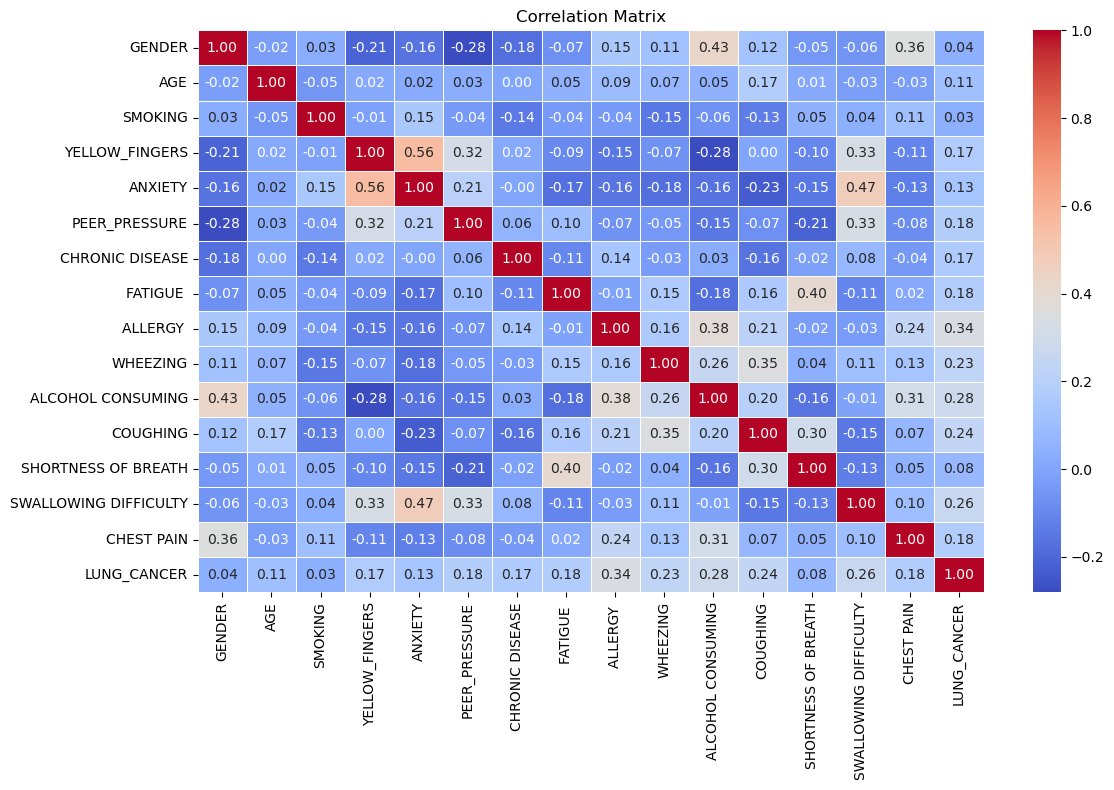

In [42]:
# correolation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
# feature selection
from sklearn.feature_selection import SelectKBest, chi2
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit_transform(X, y)

# Displaying the scores of each feature
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)
print(feature_scores)


                  Feature     Score
8                ALLERGY   5.038113
10      ALCOHOL CONSUMING  3.471255
13  SWALLOWING DIFFICULTY  3.165537
1                     AGE  2.894150
11               COUGHING  2.411264
9                WHEEZING  2.377270
5           PEER_PRESSURE  1.493949
14             CHEST PAIN  1.353374
3          YELLOW_FINGERS  1.267656
6         CHRONIC DISEASE  1.237744
7                FATIGUE   1.142174
4                 ANXIETY  0.800671
12    SHORTNESS OF BREATH  0.241344
0                  GENDER  0.170547
2                 SMOKING  0.052300


In [44]:
# remove the features with low scores lower than 0.05
low_score_features = feature_scores[feature_scores['Score'] < 0.05]['Feature']
X = X.drop(columns=low_score_features)


In [45]:
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


### Model Building

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.96      0.98        47

    accuracy                           0.96        55
   macro avg       0.90      0.98      0.93        55
weighted avg       0.97      0.96      0.97        55

Confusion Matrix:


<Axes: >

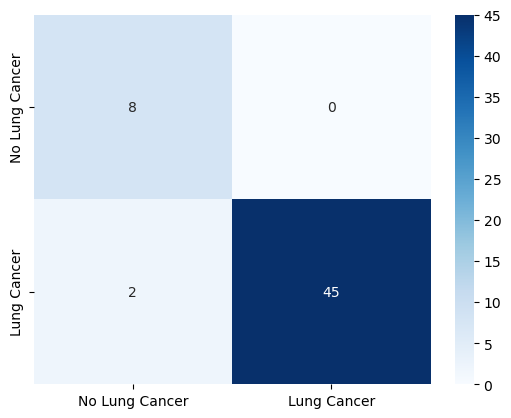

In [60]:
#split data into 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize the data

standardizer = StandardScaler()
X_train = standardizer.fit_transform(X_train)
X_test = standardizer.transform(X_test)

#Model training

model = LogisticRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Lung Cancer', 'Lung Cancer'], yticklabels=['No Lung Cancer', 'Lung Cancer'])

Decision Tree Accuracy: 0.80
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.50      0.42         8
           1       0.91      0.85      0.88        47

    accuracy                           0.80        55
   macro avg       0.64      0.68      0.65        55
weighted avg       0.83      0.80      0.81        55



<Axes: >

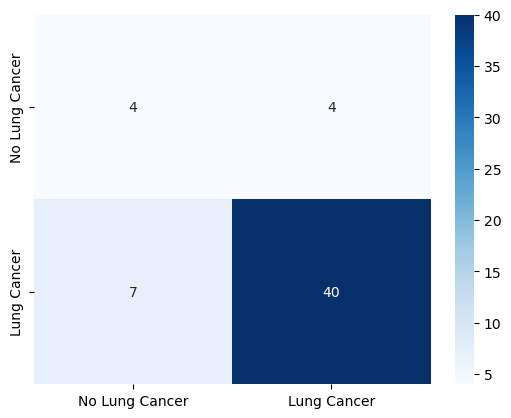

In [61]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Model evaluation for Decision Tree
y_pred_tree = decision_tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree:.2f}')
print("Decision Tree Classification Report:")

print(classification_report(y_test, y_pred_tree))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues', xticklabels=['No Lung Cancer', 'Lung Cancer'], yticklabels=['No Lung Cancer', 'Lung Cancer'])